# Machine Learning I

Machine learning (ML) is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and models that enable computers to learn and improve their performance on a task without being explicitly programmed. ML relies on training data to identify patterns and relationships, which are then used to make predictions or decisions. The main types of ML are supervised learning, unsupervised learning, and reinforcement learning. Supervised learning involves learning from labeled data, while unsupervised learning identifies patterns in unlabeled data. Reinforcement learning relies on trial and error, with agents learning to perform tasks through a system of rewards and penalties. Applications of ML span numerous industries, including healthcare, finance, marketing, and self-driving cars.

To dip our toes into the world of machine learning, we will use the scikit-learn package (which we've already used for doing regressions). Scikit-learn is an open-source Python library that provides a wide range of machine learning algorithms, tools, and utilities for data analysis and predictive modeling. Built on top of NumPy, SciPy, and Matplotlib, scikit-learn is a versatile and relatively user-friendly package that will allow us to experiment with different machine learning techniques.

Machine learning is not magic. In fact, we've already used one of the most fundemental machine learning algorithms there is, which is a linear predictor, a.k.a. a linear regression model.

A plain old linear regression has one of the primary characteristics of all machine learning algorithms, which is that it learns something, in this case a slope and a y-intercept, from the data.

All an ordinary regression is missing is one of the other primary characteristics of machine learning algorithms, which is the application to data that was **not** part of the learning process. If a regression can successfully predict data that it has never "seen" before, we can be confident that it has learned the correct slope and y-intercept. 

## Splitting data into *training* and *test* sets.

Machine learning can be described as the process of taking a general algorithm, such as "there is a linear relationship between median income in a city and the median house price", into a specific relationship, like $price = a*income + b$, with learned values for $a$ and $b$ that can be used to predict the median house prices for *other* cities - *cities that our algorithm has not encountered before*.

In order to prove our algorithm works, that is, to prove it is good enough to predict or classify new data, we hold back some data in the original data set as "test" data. We then teach our algorithm using the remaining "training" data. Once our algorithm is trained, we try it out on the test data to see how well it performs on data it has never encountered before.

Put in other words, the idea behind splitting data into test and training sets is to evaluate the performance and generalizability of a machine learning model. This division allows us to train the model on one subset of the data (the training set) and then test its performance on unseen data (the test set). The process helps to ensure that the model is not overfitting and can make accurate predictions when presented with new, unseen data.

Here are the key reasons for splitting data into test and training sets:

Model evaluation: By testing the model on unseen data, we can evaluate its performance and reliability more objectively. This evaluation helps us understand how well the model generalizes beyond the specific examples it was trained on.

Overfitting prevention: Overfitting occurs when a model learns the noise or random fluctuations in the training data, resulting in poor performance on new data. By using a separate test set, we can identify if the model is overfitting and adjust its complexity accordingly.

Model selection: In practice, there are often multiple models or algorithms to choose from when solving a particular problem. Splitting the data allows us to compare the performance of different models on the same test set and choose the one that performs best.

To ensure a fair evaluation, it's essential to randomly split the data into training and test sets, maintaining the original distribution of the target variable. In practice, the split ratio varies depending on the dataset size and problem domain, with common ratios being 70% training / 30% test or 80% training / 20% test. For smaller datasets, techniques such as cross-validation can be used to make better use of the limited data available.

## Two machine learning algorithms

In this tutorial, we will look at two simple supervised machine learning algorithms, one that predicts *numerical values* of it's targets, and one that predicts the *categories* of the targets.

The basic workflow for machine learning is:

- load the needed things from numpy, matplotlib and, the problem-specific tools from scikit-learn
- get the data and wrangle it into shape if necessary
- split the data into training and test sets
- train the machine learning algorithm
- evaluate the performance of the algorithm

## Linear Predictor

Here, we will revisit the linear regression from a machine learning standpoint. Our specific workflow will be:

- import the needed libraries
- create a toy data set to play with
- split the data into a training set and test set
- train (fit) the linear predictor to the training data
- see how well the model predicts the test data

Import our libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression              # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics

>Note: scikit-learn has a LOT of stuff! At least half of the battle is perusing the documentation and figuring out what specific methods you need to use. Once you know what to use, using it is rather easy!

Let's create a toy data set for us to play with. (For just one target and one predictor (feature), we could easily use numpy to simulate the data like we have done before, but `make_regression` is *much* easier if we have multiple predictor variables.)

In [2]:
# Create a synthetic regression dataset
n_samples = 100
n_features = 1
n_targets = 1

X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_targets=n_targets, noise=15, random_state=42)

Our raw data set consists of values in `X` called "predictors" and values in `y` called "targets". Our goal is to learn the relationship between the predictors and the target, so we can then predict future target values based on any new predictor values. In this case, a regression is what we will use to learn the relationship.

> A side note on terminology: Picture a 2D scatterplot – some y values vs. some x values. Laboratory scientists would use the phrases "dependent variable" and "independent variable" to describe the axes. A statistician might call the the y-axis variable the "outcome" and the x-axis values the "treatment". In the machine learning world, the terms "target" and "predictor" are used. Same games, just different names.

---

Now let's look at our predictor and target data. First let's check their types:

In [3]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


---

So they are both numpy ndarrays. Scikit-learn was built on numpy, so numpy arrays are the standard format for data in the scikit-learn world.

---

Now let's look at their shapes:

In [4]:
print(X.shape, y.shape)

(100, 1) (100,)


---

So `X` is 2-dimensional and `y` is 1-dimensional. This is because we can and often do have more than 1 predictor, and each predictor goes in a column of `X`, just like we're used to. Most often, however, there is only a single target, so `y` need not have a second dimension. In mathematics (particularly linear algebra and statistics), it is standard to denote matrices with capital letters and vectors with lowercase letters, hence `X` and `y`.

*Note: This is the standard data format in machine learning, and the way virtually all scikit-learn methods will be 1) expecting to get data and 2) returning data.*

Now let's split the data into training and test sets using `train_test_split()`, which also allows us to specify some parameters such as the seed of the random number generator in case we need to reproduce the split exactly in the future.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

Use the cell below to examine the shapes of the training and test sets. After doing that, you should be able to figure out what the `test_size` argument to `train_test_split()` does.

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80,) (20,)


---

Now we can make a linear regression object.

In [7]:
model = LinearRegression() # too easy!

And train it on the training data using its `fit()` method.

In [8]:
model.fit(X_train, y_train)

LinearRegression()

---

In the cell below, use the `model.<tab>` trick to see what our `model` has to offer. It looks like we can grab the slope (or "coefficient" in the lingo), intercept, and generate predicted values.

In [9]:
model.

SyntaxError: invalid syntax (1068564517.py, line 1)

---

Let's visually check our fit with a quick scatterplot. First we'll get our predicted target values for the X training values.

In [10]:
y_pred = model.predict(X_train)

Now we can make the actual plot.

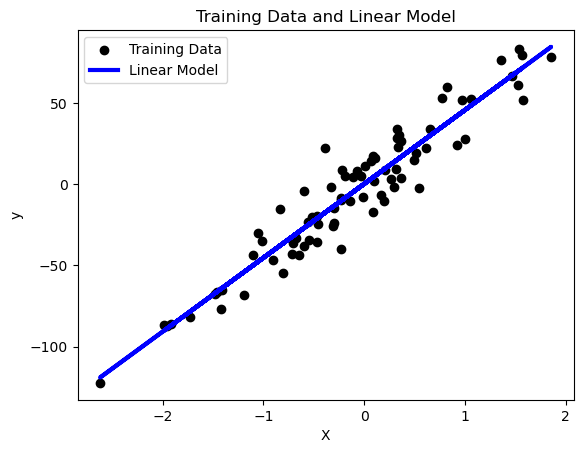

In [11]:
# make scatterplot of the training data and the linear model
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

---

Now for the fun part! Let's plot our training data, test data, and predicted values to see how we did! Just re-make the above plot, but add on the test data that we held back in a different color!

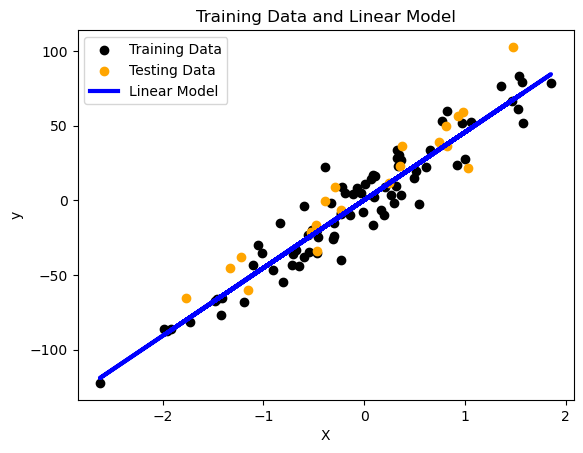

In [12]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color = 'orange', label = 'Testing Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

---

Okay, now we can use our model to compute predicted target values at the X values that were held back for training. These will just be the points on the green line above at the x-axis locations of the red data points.

In [13]:
y_pred_test = model.predict(X_test)

Just to be sure, let's do a quick scatterplot.

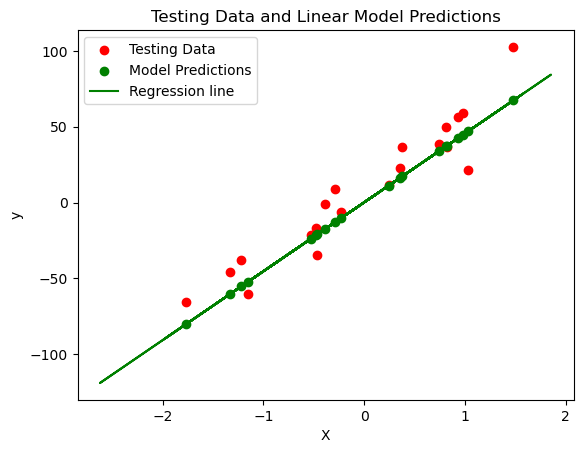

In [14]:
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.scatter(X_test, y_pred_test, color='green', label='Model Predictions')
plt.plot(X_train, y_pred, c='green', label='Regression line')
plt.title('Testing Data and Linear Model Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Sure enough, the green points are all in a straight line, and each one shares its x value with one of the red points from the test data.

Now let's compute some metrics, like the MSE, $R^2$, and the correlation.

In [15]:
# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 234.46
R^2 Score: 0.87
Correlation: 0.93


The MSE by itself isn't very useful. We know we want it low, but low relative to what? If we had another model to test (like a second order polynomial), then we could compare the two MSEs and favor the model with the lower one.

Correlation is another matter, as we know its absolute value has to be between 0 and 1, and the closer to 1 the better. Here we have 0.93, which is quite high, and our predictions are capturing 87% of the variance in the test data (the rest of the variability being random noise). Not bad!

## Classification

A major use of machine learning is classification - predicting the categories that things belong to based upon measurements of those things. For example, we might want a classifier that can automatically distinguish between benign and malignant tumors based upon measurements of size, shape, etc. done on x-ray images. 

### Nearest Neighbor

The most basic classifier is a "nearest neighbor" classifier. In it's simplest form - and this is ridiculously simple - the classifier just stores the locations and labels of the training data. When it gets a new observation to classify, it simply looks to see what observation from the training set is closest, and assigns the new observation the same label.

The classifier can be made a little fancier by looking at the nearest 3 or 5 neighbors and going with the majority. For example, in a 3-nearest-neigbor classifier, if 2 of the closest points are of category "A" and the 3rd is of category "B", the classifier would assign the test point the label "A".

Let's try this type of classifier on the famous iris dataset created by Sir Ronald Fisher. This dataset has measurements of the lengths and widths of the petals and sepals for 3 species of iris flowers. Like the titanic, it's a data set that every data science student has to touch at least once!

You can see a more detailed description of the iris data in the [scikit-learn documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html).

#### Preliminaries

Load our libraries.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

Now we can load the dataset and see what it looks like.

In [17]:
# Load the Iris dataset
iris = load_iris()

---

Now that we have the data object, let's explore it a little bit. Remember the \<tab\> trick!

In [18]:
iris.

SyntaxError: invalid syntax (3137475435.py, line 1)

Notice in particular that `iris.target` contains a "dummy" variable that codes the species with numbers. This is very common, although sometimes we want to convert these back to the actual names, as we do below for plotting.

---

##### Make machine learning format data

This is our first job, but it's pretty easy because `iris.data` is already a matrix, and `iris.target` is already a vector.

In [21]:
X = iris.data     # predictor matrix
y = iris.target   # target vector

In [22]:
print(X.shape, y.shape)

(150, 4) (150,)


#### Visualizing the data

This is where pandas and seaborn come in handy! The code below should all look familiar, except for the `Categorical.from_codes()` method that lets us make a column of species names from the codes in the target vector. If you didn't look at what `iris.target_names` is above, take a second to do that now.

/Users/phoebewang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


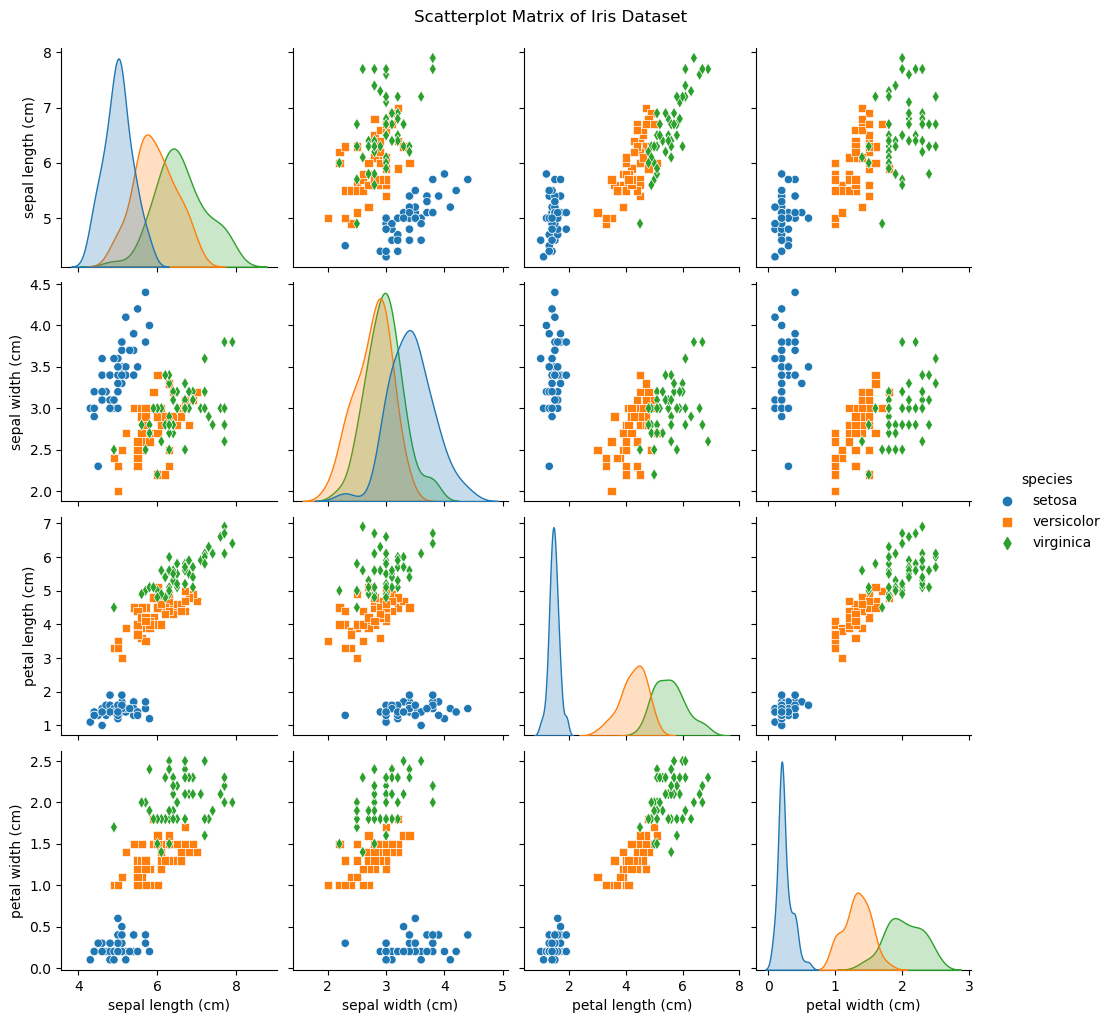

In [23]:
# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns = iris.feature_names)

# Add the target column to the DataFrame as actual names
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Create a scatterplot matrix using seaborn's pairplot()
sns.pairplot(df, hue='species', markers=["o", "s", "d"])
plt.suptitle("Scatterplot Matrix of Iris Dataset", y=1.02)
plt.show()


Take a minute to ponder this figure. If you had to pick 2 variables to use to separate the species, which ones would you pick?

For illustration purposes, we'll use the first two (sepal length and width), though this clearly wouldn't be the best choice. But it should give us some mistakes (misclassifications) to look at!

In [28]:
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)

Now lets make a scatterplot of the data we're going to use. This should look like the plot in the second row of the first column, above. 

If you're feeling sharp, you can write your own code instead of using the code below! You don't have to get fancy, but make sure the species are distinguished by either color or symbol.

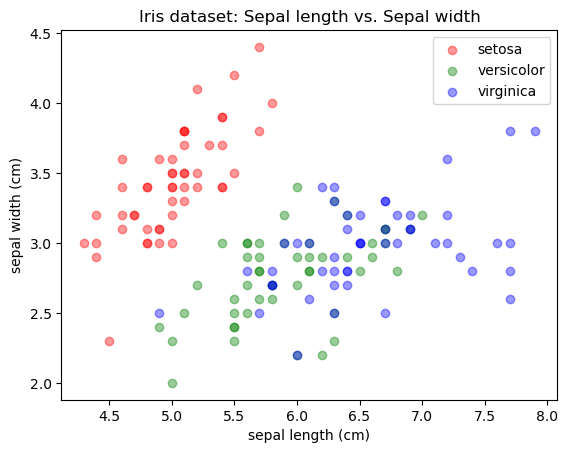

In [29]:
# Create a scatter plot of the first two features with color indicating category
colors = ['red', 'green', 'blue']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X[y == i, 0], X[y == i, 1], 
                color=color, label=target_name, alpha = 0.4)

plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(loc="upper right")
plt.title("Iris dataset: Sepal length vs. Sepal width")
plt.show()

---

#### Splitting into training and test sets

In the cell below, split the data into training and testing sets.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Look at the shapes of training and test data. Do they make sense?

In [160]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


---

#### Create and train the classifier

Now we can create the classifier.

In [161]:
from sklearn.neighbors import KNeighborsClassifier

# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

---

In the cell below, train our classifier using using the `fit()` method, just like with the regression model above.

In [162]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

---

#### Predicting the test data

In the cell below, generate the predicted values from our classifier and put them in a variable called `y_pred`.

In [163]:
y_pred = knn.predict(X_test)

Look at the shape of `y_pred` – it should match the shape of `y_test`, which holds the true values.

In [164]:
y_pred.shape

(30,)

In the cell below, see if you can come up with a quick way to see how we did by comparing `y_pred` and `y_test`. Remember, there are only 3 possible target values (0, 1, 2) and they either match at any given location in `y_pred` and `y_test`, or they don't.

In [165]:
# compare y_pred and y_test
match = 0
not_match = 0

for i in range(len(y_pred)):
    
    round_y_pred = int(round(y_pred[i])) 
    
    if round_y_pred == y_test[i]:
        match += 1
    else:
        not_match += 1

similarity = match/(match+not_match) *100

print(f"{similarity:.2f}% of y_pred match with y_test.")

76.67% of y_pred match with y_test.


---

Now let's make a plot of our predicted values. Just recycle the code from above substituting `X_test` for `X` and `y_pred` for `y`.

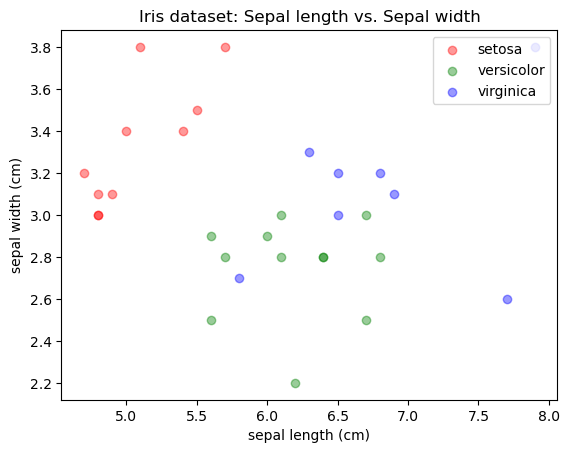

In [166]:
for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], 
                color=color, label=target_name, alpha = 0.4)

plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(loc="upper right")
plt.title("Iris dataset: Sepal length vs. Sepal width")
plt.show()

Does this look reasonable?

Yes, this looks reasonable as the clusters match the original category/classification in the iris dataset.

---

Let's plot the predicted and test values on the same graph. We can offset the predicted and true points a little tiny bit so we can see where the mistakes are.

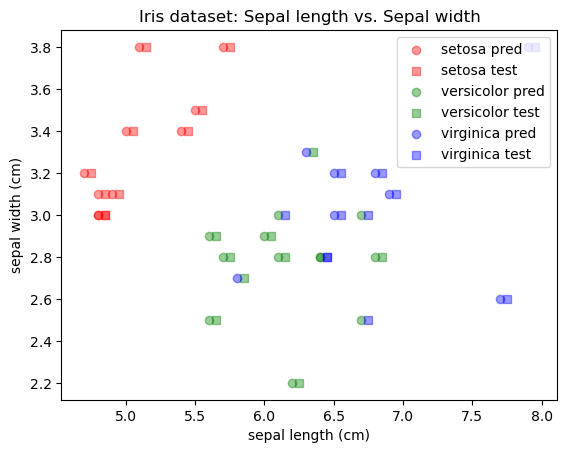

In [167]:
offset = 0.05 # small offset to see both sets of values

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], 
                color=color, label=target_name+" pred", alpha = 0.4)
    plt.scatter(X_test[y_test == i, 0]+offset, X_test[y_test == i, 1], 
                color=color, marker = 's', label=target_name+" test", alpha = 0.4)

plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(loc="upper right")
plt.title("Iris dataset: Sepal length vs. Sepal width")
plt.show()

So everywhere the colors match, our classification was correct; where there's a mismatch, it wasn't. It looks like "setosa" was categorized perfectly, but there were some mismatches with the other two.

---

#### Performance Metrics for Classification

The scikit-learn package provides a few ways to assess the performance of classifier by comparing the true (test) values with the predicted values.

The simplest of these is the accuracy score, which you may have come up with yourself above.

In [168]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

Accuracy Score: 0.77%


Next, we can look at the confusion matrix:

In [169]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(species)
print(conf_matrix)

['setosa' 'versicolor' 'virginica']
[[10  0  0]
 [ 0  7  2]
 [ 0  5  6]]


In this matrix, the true labels are the rows and the predicted labels are the columns. Each cell entry shows how many observations had the corresponding true and predicted label. The entries along the diagonal are thus all correct. The off diagonals are the errors, and we can see that 5 examples of virginica were labeled as "versicolor", and 6 errors were made for these same 2 species in the other direction for 11 total errors in all.

In [171]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30



The classification_report function provides a summary of a classifier's performance in terms of various evaluation metrics. The upper part of the table includes the "precision", "recall", "F1-score", and support for each class ("support" is the fancy machine-learning word for "sample size").

*Precision*: Precision is the ratio of true positive predictions to the sum of true positive and false positive predictions. It measures the classifier's ability to correctly identify positive instances out of all instances predicted as positive. A high precision indicates a low false positive rate.

For *virginica*, this would be the number of times *virginica* was correctly indentified divided by the total number of times *any* flower was identified as *virginica*.

In the cell below, compute this "by hand" from the values in the table.

In [173]:
6/8

0.75

---

*Recall (Sensitivity)*: Recall is the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the classifier's ability to identify all the positive instances. A high recall indicates a low false negative rate.

For *virginica*, this would be the number of times *virginica* was correctly indentified divided by the total number of *virginica* flowers in the sample:

In the cell below, compute this "by hand" from the values in the table.

In [174]:
6/11

0.5454545454545454

---

F1-score: The F1-score is the harmonic mean of precision and recall, and it provides a single value that balances both metrics. It ranges from 0 (worst) to 1 (best), with a higher F1-score indicating better overall performance.

For *virginica*, this would be:

In [175]:
2/((1/0.57)+(1/0.62))  # compute harmonic mean

0.5939495798319326

---

*Support*: Support is just the number of actual occurrences of each class in the dataset. It helps interpret the results of the other metrics by providing context about the class distribution.

*Accuracy*: Proportion of correctly labeled observations - the same as computed by `accuracy_score()`.

The classification report also provides macro and weighted averages for the precision, recall, and F1-score:

*Macro Average*: The macro average computes the arithmetic mean of the metric scores for each class, without considering the class distribution. It treats all classes equally, which may not be ideal for imbalanced datasets.

*Weighted Average*: The weighted average computes the average of the metric scores for each class, weighted by the support of each class. This approach accounts for class imbalance and provides a more representative overall performance metric.

---

## Summary

In this tutorial, we have looked at two basic machine learning algorithms:

- a linear predictor that estimates numberical target values
- a nearest neighbor classifier that predicts target categories

These techniques are not mysterious. The both start with a general algorithm, use training data to tune the general algorithm into a problem-specific one, and then use this to predict targets from novel predictor data.

In the next tutorial, we'll look at some more sophisticated categorization algorithms.